In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
def accounting(arr):
    asd = (arr[:-1]-125)/400*(arr[:-1]**(0.5+(abs(arr[:-1]-arr[1:])/50)))
    last = arr[-1]
    last = (last-125)/400*(last**0.5)
    return asd.sum()+last

def total(sol,d):
    global cost
    
    return cost[np.arange(5000),sol].sum()+accounting(d)

In [3]:
df = pd.read_csv('family_data.csv')

choice = df.iloc[:,1:-1].values - 1
people = df.iloc[:,-1].values
cost = np.ones([5000,100],dtype = int)*500 + (36+398)*people.reshape(5000,1)

fixed = [0,50,50,100,200,200,300,300,400,500]
variable = [0,0,9,9,9,18,18,36,36,36+199]
for f in range(5000):
    for d in range(10):
        day = choice[f,d]
        cost[f,day] = fixed[d]+variable[d]*people[f]

In [12]:
base = pd.read_csv('base.csv').iloc[:,1].values-1
day = np.zeros(100)
for i,n in enumerate(base):
    day[n] += people[i]

In [19]:
score = []
for _ in range(4):
    done = 0
    for f in range(5000):
        if f%1000==0:
            print(f,done,cost[np.arange(5000),base].sum())
        current_day = base[f]
        current_cost = cost[f,current_day]
        n = people[f]
        for f2 in range(5000):
            current_day2 = base[f2]
            current_cost2 = cost[f2,current_day2]
            n2 = people[f2]
            if 125<=day[current_day]-n+n2<=300 and 125<=day[current_day2]-n2+n<=300:
                improve1 = cost[f,current_day2]-current_cost
                improve2 = cost[f2,current_day]-current_cost2
                if improve1+improve2 < 0:
                    base[f] = current_day2
                    base[f2] = current_day
                    day[current_day] -= n
                    day[current_day] += n2
                    day[current_day2] += n
                    day[current_day2] -= n2
                    done += 1
                    score.append(cost[np.arange(5000),base].sum())
    print(done)

0 0 61647
1000 7 61034
2000 11 60939
3000 14 60898
4000 16 60821
21
0 0 60557
1000 0 60557
2000 0 60557
3000 0 60557
4000 0 60557
0
0 0 60557
1000 0 60557
2000 0 60557
3000 0 60557
4000 0 60557
0
0 0 60557
1000 0 60557
2000 0 60557
3000 0 60557
4000 0 60557
0


In [20]:
for _ in range(5):
    done = 0
    for f in range(5000):
        if f%1000==0:
            print(f,done,cost[np.arange(5000),base].sum())
        current_day = base[f]
        current_cost = cost[f,current_day]
        n = people[f]
        for current_day2 in range(100):
            
            if 125<=day[current_day]-n<=300 and 125<=day[current_day2]+n<=300:
                improve = cost[f,current_day2]-current_cost
                
                if improve < 0:
                    base[f] = current_day2
                    
                    day[current_day] -= n
                    
                    day[current_day2] += n
                    done += 1
                    score.append(cost[np.arange(5000),base].sum())
    print(done)

0 0 60557
1000 2 60457
2000 3 60371
3000 4 60303
4000 7 60153
8
0 0 60035
1000 2 59935
2000 2 59935
3000 2 59935
4000 2 59935
2
0 0 59935
1000 0 59935
2000 0 59935
3000 0 59935
4000 0 59935
0
0 0 59935
1000 0 59935
2000 0 59935
3000 0 59935
4000 0 59935
0
0 0 59935
1000 0 59935
2000 0 59935
3000 0 59935
4000 0 59935
0


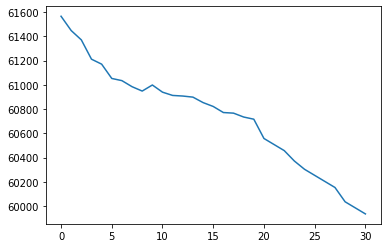

In [21]:
plt.plot(score)